In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# tiobe index
tiobe_df = pd.read_csv('tiobeindex2.csv')
tiobe_df['Month'] = pd.to_datetime(tiobe_df['Month'])

In [ ]:
tiobe_languages = list(tiobe_df.columns)
tiobe_languages.remove('Month')

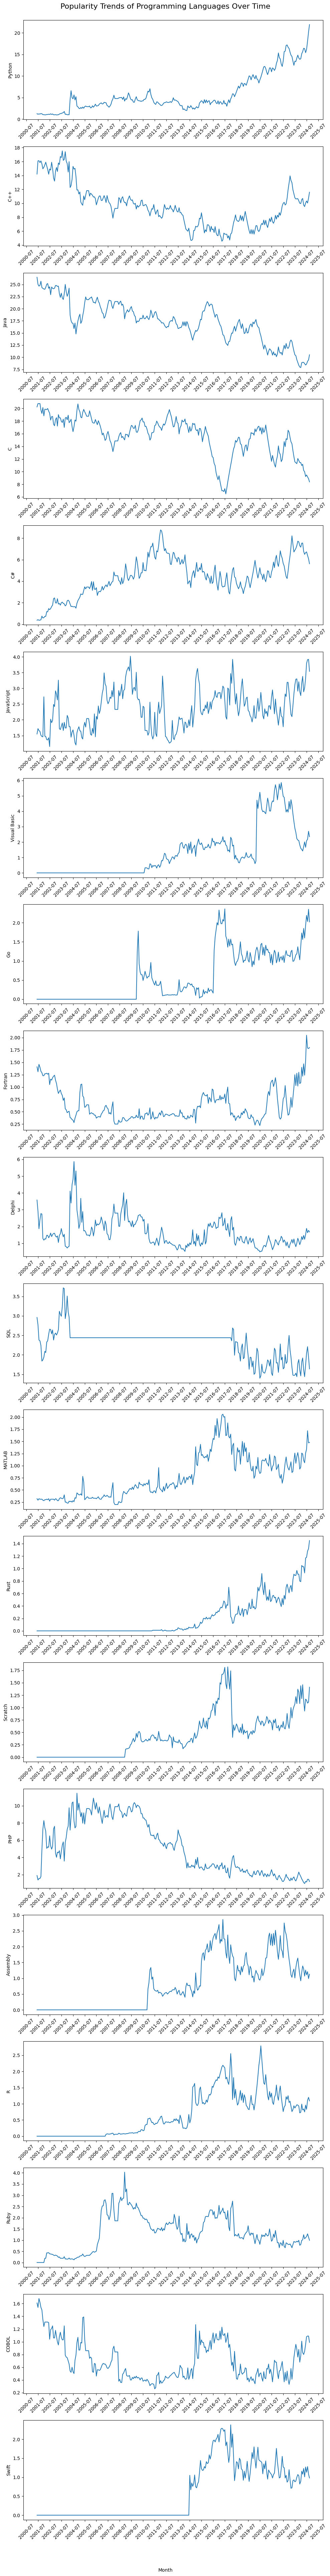

In [45]:
num1 = len(tiobe_languages)
fig, axes = plt.subplots(num1, 1, figsize=(10, 4 * num1), sharex=False)

for i, language in enumerate(tiobe_languages):
    ax = axes[i]
    ax.plot(tiobe_df['Month'], tiobe_df[language], label=language)
    ax.set_ylabel(language)
    
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)
    
fig.suptitle("Popularity Trends of Programming Languages Over Time", fontsize=16, y=1.0)
fig.text(0.5, 0.04, 'Month', ha='center')
plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.show()


In [ ]:
# google trends
gtrend_df = pd.read_csv('googletrends2.csv')
gtrend_df['Month'] = pd.to_datetime(gtrend_df['Month'])

non_zero_columns = gtrend_df.loc[:, (gtrend_df != 0).any(axis=0)]
gtrend_languages = [col for col in non_zero_columns.columns if col != 'Month']  
num2 = len(gtrend_languages)

In [44]:
fig, axes = plt.subplots(num2, 1, figsize=(10, 4 * num2), sharex=False)

for i, language in enumerate(gtrend_languages):
    ax = axes[i]
    ax.plot(gtrend_df['Month'], gtrend_df[language], label=language)
    ax.set_ylabel(language)
    
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)
    
fig.suptitle("Google Search Result of Programming Languages Over Time", fontsize=16, y=1.0)
fig.text(0.5, 0.04, 'Month', ha='center')
plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.show()


In [ ]:
# wikipedia
wiki_df = pd.read_csv('cleaned_wikidata22.csv')
wiki_df['Date'] = pd.to_datetime(wiki_df['Date'])

non_zero_columns = wiki_df.loc[:, (wiki_df != 0).any(axis=0)]
wiki_languages = [col for col in non_zero_columns.columns if col != 'Date']  
num3 = len(wiki_languages)

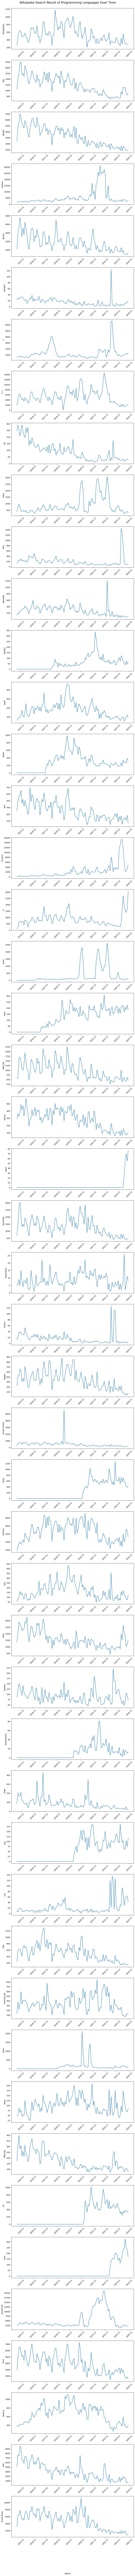

In [43]:
fig, axes = plt.subplots(num3, 1, figsize=(10, 4 * num3), sharex=False)

for i, language in enumerate(wiki_languages):
    ax = axes[i]
    ax.plot(wiki_df['Date'], wiki_df[language], label=language)
    ax.set_ylabel(language)
    
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)
    
fig.suptitle("Wikipedia Search Result of Programming Languages Over Time", fontsize=16, y=1.0)
fig.text(0.5, 0.04, 'Month', ha='center')
plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.show()


In [ ]:
# stack overflow
stack_df = pd.read_csv('yearly_stack_overflow_count.csv')

count_columns = [col for col in stack_df.columns if 'stack_overflow_count' in col]
df_filtered = stack_df[(stack_df[count_columns] != 0).any(axis=1)]

df_long = df_filtered.melt(id_vars='programming language', 
                           var_name='year', 
                           value_name='count')

df_long['year'] = df_long['year'].str.extract('(\d+)$').astype(int)

st_languages = df_filtered['programming language'].unique()
num4 = len(st_languages)

In [40]:
fig, axes = plt.subplots(num4, 1, figsize=(10, 4 * num4), sharex=False)

for i, language in enumerate(st_languages):
    ax = axes[i]
    lang_data = df_long[df_long['programming language'] == language]
    
    ax.plot(lang_data['year'], lang_data['count'], label=language)
    ax.set_ylabel(language)
    ax.set_xlabel('Year')
    
    ax.tick_params(axis='x', rotation=45)


fig.suptitle("Stack Overflow Search Result of Programming Languages Over Time", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()